# 对数据库操作的演示

In [1]:
# 请先配置好数据库连接信息 -> database/config/database-config.txt
# 请先运行该脚本，再运行其他脚本
# 导入数据库依赖文件
import database.utils as db_utils
import database.models as db_models
import database.api as db_api

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ChengLan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# 简易化初始化数据库（创建数据库，创建数据表，内容生成）
db_utils.init_database()

2024-05-23 23:32:52,454 - database.utils - WARNING - Database already exists.
2024-05-23 23:32:52,521 - database.utils - INFO - Tables dropped successfully.
2024-05-23 23:32:52,610 - database.utils - INFO - Tables created successfully.
2024-05-23 23:32:52,611 - database.utils - INFO - Start to generate fake data based on the config file.
Adding Admin Data |████████████████████████████████████████| 3/3 [100%] in 0.0s (1388.89/s) 
2024-05-23 23:32:52,655 - database.utils - INFO - Admin data added successfully.
Adding Supplier Data |████████████████████████████████████████| 20/20 [100%] in 0.0s (16982.25/s) 
2024-05-23 23:32:52,664 - database.utils - INFO - Supplier data added successfully.
Adding Vegetable Data |████████████████████████████████████████| 36/36 [100%] in 0.0s (76840.99/s) 
2024-05-23 23:32:52,676 - database.utils - INFO - Vegetable data added successfully.
Adding Customer Data |████████████████████████████████████████| 2000/2000 [100%] in 0.1s (22139.84/s) 
2024-05-23 23:3

In [3]:
#使用api获取各类数据DataFrame
vegeDF = db_api.getVegetableDataFrame() # 获取蔬菜数据并转换为 Pandas 的 DataFrame
vegeDF.head()

,vegetable_name,purchase_quantity,purchase_price,supplier_id,selling_price,vip_price
id,,,,,,
1,西红柿,50.0,3.88,19,4.66,4.19
2,黄瓜,100.0,2.61,10,3.13,2.82
3,茄子,50.0,3.48,2,4.17,3.75
4,土豆,200.0,0.98,6,1.18,1.06
5,胡萝卜,50.0,1.39,7,1.67,1.50


In [3]:
# 使用api实用小工具
# 获取所有顾客男女人数
db_api.getCustomerGenderCounts()

{'male': 743, 'female': 757}

In [4]:
# 获取某个蔬菜的评价词汇频率总汇
db_api.getReviewWordFrequency('豆角')

{'Good': 12,
 'fresh': 12,
 'great': 3,
 'good': 3,
 'worse': 1,
 'Wow': 1,
 'Fresh': 1}

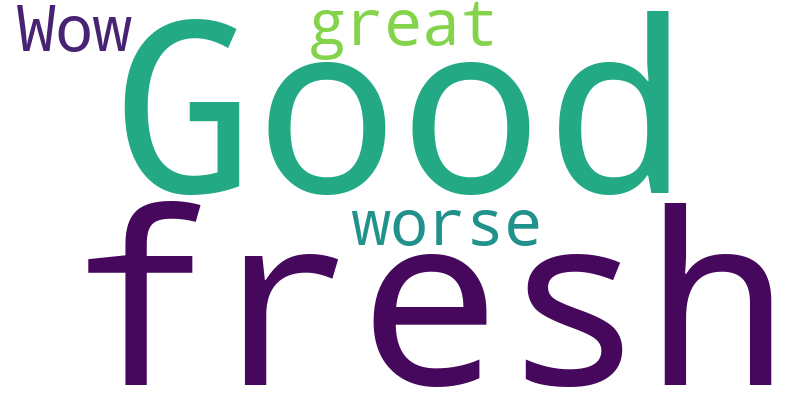

In [5]:
# 制作云图
import wordcloud as wc

cloudText = ' '.join(db_api.getReviewWordFrequency('豆角').keys())
wordCloud = wc.WordCloud(width=800, height=400, background_color='white').generate(cloudText)
wordCloud.to_file('./imgs/豆角评价.png')
wordCloud.to_image() # 显示图片